In [48]:
%pip install -q transformers datasets evaluate accelerate "gluonts[torch]" ujson tqdm

Note: you may need to restart the kernel to use updated packages.


In [49]:
prediction_length = 24
context_length = prediction_length*2
batch_size = 128
num_batches_per_epoch = 100
epochs = 50
scaling = "std"

In [50]:
encoder_layers=2
decoder_layers=2
d_model=16

In [51]:
import pandas as pd

df = pd.read_csv('ETTh1.csv')

In [52]:
from gluonts.dataset.repository.datasets import get_dataset
import gluonts.dataset as dt
from gluonts.dataset.common import ListDataset
from gluonts.dataset.pandas import PandasDataset
# train_data = [{"start": df["date"][i], "target": df["HUFL"][i]} for i in range(len(df))]
data = []
for i in range(len(df)):
    data_point = {
        "start": pd.Timestamp(df["date"][i]),
        "target": df.iloc[i, 1:].values.tolist()  # Берем значения с индекса 1 и до конца строки
    }
    data.append(data_point)

# Создаем объект ListDataset из данных
help(ListDataset)
dataset = ListDataset(data, freq="D")
# # Следующие строки кода создают объект ListDataset из данных
# # dataset = PandasDataset(df)
# # dataset = get_dataset("traffic")
#freq = dataset.metadata.freq
#prediction_length = dataset.metadata.prediction_length


Help on function ListDataset in module gluonts.dataset.common:

ListDataset(data_iter: gluonts.dataset.Dataset, freq: str, one_dim_target: bool = True, use_timestamp: bool = False, translate: Optional[dict] = None) -> List[Dict[str, Any]]
    Dataset backed directly by a list of dictionaries.
    
    Parameters
    ----------
    data_iter
        Iterable object yielding all items in the dataset.
        Each item should be a dictionary mapping strings to values.
        For instance: {"start": "2014-09-07", "target": [0.1, 0.2]}.
    freq
        Frequency of the observation in the time series.
        Must be a valid Pandas frequency.
    one_dim_target
        Whether to accept only univariate target time series.



In [53]:
import matplotlib.pyplot as plt

# train_example = next(iter(dataset.train))
# test_example = next(iter(dataset.test))

# num_of_samples = 4*prediction_length

# figure, axes = plt.subplots()
# axes.plot(train_example["target"][-num_of_samples:], color="blue")
# axes.plot(
#     test_example["target"][-num_of_samples - prediction_length :],
#     color="red",
#     alpha=0.5,
# )

# plt.show()


In [70]:
from gluonts.dataset.repository.datasets import get_dataset

dataset = get_dataset("tourism_quarterly")
freq = dataset.metadata.freq
prediction_length = dataset.metadata.prediction_length


Download tourism_quarterly_dataset.zip:: 96.0kB [00:00, 124kB/s]
creating json files: 100%|██████████| 427/427 [00:00<00:00, 184236.99it/s]


In [71]:
train_dataset = dataset.train
test_dataset = dataset.test

In [72]:
from gluonts.torch.model.d_linear.estimator import DLinearEstimator

# Define the DLinear model with the same parameters as the Autoformer model
estimator = DLinearEstimator(
    prediction_length=dataset.metadata.prediction_length,
    context_length=dataset.metadata.prediction_length*2,
    scaling=scaling,
    hidden_dimension=2,
    
    batch_size=batch_size,
    num_batches_per_epoch=num_batches_per_epoch,
    trainer_kwargs=dict(max_epochs=epochs)
)


In [73]:
predictor = estimator.train(
    
    training_data=train_dataset, 
    cache_data=True, 
    shuffle_buffer_length=1024,
    epochs = 100
)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
c:\Users\evgeny\miniconda3\envs\test_tsf\lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
INFO: 
  | Name  | Type         | Params
---------------------------------------
0 | model | DLinearModel | 553   
---------------------------------------
553       Trainable params
0         Non-trainable params
553       Total params
0.002     Total estimated model params size (MB)
INFO:lightning.pytorch.callb

Epoch 0: |          | 100/? [00:00<00:00, 113.25it/s, v_num=3, train_loss=10.50]

INFO: Epoch 0, global step 100: 'train_loss' reached 10.46087 (best 10.46087), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=0-step=100.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 100: 'train_loss' reached 10.46087 (best 10.46087), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=0-step=100.ckpt' as top 1


Epoch 1: |          | 100/? [00:00<00:00, 120.22it/s, v_num=3, train_loss=9.010]

INFO: Epoch 1, global step 200: 'train_loss' reached 9.01033 (best 9.01033), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=1-step=200.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 1, global step 200: 'train_loss' reached 9.01033 (best 9.01033), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=1-step=200.ckpt' as top 1


Epoch 2: |          | 100/? [00:00<00:00, 118.81it/s, v_num=3, train_loss=8.950]

INFO: Epoch 2, global step 300: 'train_loss' reached 8.95187 (best 8.95187), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=2-step=300.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 2, global step 300: 'train_loss' reached 8.95187 (best 8.95187), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=2-step=300.ckpt' as top 1


Epoch 3: |          | 100/? [00:00<00:00, 121.06it/s, v_num=3, train_loss=8.950]

INFO: Epoch 3, global step 400: 'train_loss' reached 8.94944 (best 8.94944), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=3-step=400.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 3, global step 400: 'train_loss' reached 8.94944 (best 8.94944), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=3-step=400.ckpt' as top 1


Epoch 4: |          | 100/? [00:00<00:00, 120.83it/s, v_num=3, train_loss=8.890]

INFO: Epoch 4, global step 500: 'train_loss' reached 8.89212 (best 8.89212), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=4-step=500.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 4, global step 500: 'train_loss' reached 8.89212 (best 8.89212), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=4-step=500.ckpt' as top 1


Epoch 5: |          | 100/? [00:00<00:00, 120.59it/s, v_num=3, train_loss=8.830]

INFO: Epoch 5, global step 600: 'train_loss' reached 8.83211 (best 8.83211), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=5-step=600.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 5, global step 600: 'train_loss' reached 8.83211 (best 8.83211), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=5-step=600.ckpt' as top 1


Epoch 6: |          | 100/? [00:00<00:00, 122.45it/s, v_num=3, train_loss=8.820]

INFO: Epoch 6, global step 700: 'train_loss' reached 8.82014 (best 8.82014), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=6-step=700.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 6, global step 700: 'train_loss' reached 8.82014 (best 8.82014), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=6-step=700.ckpt' as top 1


Epoch 7: |          | 100/? [00:00<00:00, 111.18it/s, v_num=3, train_loss=8.780]

INFO: Epoch 7, global step 800: 'train_loss' reached 8.78012 (best 8.78012), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=7-step=800.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 7, global step 800: 'train_loss' reached 8.78012 (best 8.78012), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=7-step=800.ckpt' as top 1


Epoch 8: |          | 100/? [00:00<00:00, 112.19it/s, v_num=3, train_loss=8.710]

INFO: Epoch 8, global step 900: 'train_loss' reached 8.70615 (best 8.70615), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=8-step=900.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 8, global step 900: 'train_loss' reached 8.70615 (best 8.70615), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=8-step=900.ckpt' as top 1


Epoch 9: |          | 100/? [00:00<00:00, 108.74it/s, v_num=3, train_loss=8.750]

INFO: Epoch 9, global step 1000: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 9, global step 1000: 'train_loss' was not in top 1


Epoch 10: |          | 100/? [00:00<00:00, 101.78it/s, v_num=3, train_loss=8.660]

INFO: Epoch 10, global step 1100: 'train_loss' reached 8.65859 (best 8.65859), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=10-step=1100.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 10, global step 1100: 'train_loss' reached 8.65859 (best 8.65859), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=10-step=1100.ckpt' as top 1


Epoch 11: |          | 100/? [00:00<00:00, 102.71it/s, v_num=3, train_loss=8.720]

INFO: Epoch 11, global step 1200: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 11, global step 1200: 'train_loss' was not in top 1


Epoch 12: |          | 100/? [00:00<00:00, 100.60it/s, v_num=3, train_loss=8.670]

INFO: Epoch 12, global step 1300: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 12, global step 1300: 'train_loss' was not in top 1


Epoch 13: |          | 100/? [00:00<00:00, 104.82it/s, v_num=3, train_loss=8.650]

INFO: Epoch 13, global step 1400: 'train_loss' reached 8.65053 (best 8.65053), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=13-step=1400.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 13, global step 1400: 'train_loss' reached 8.65053 (best 8.65053), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=13-step=1400.ckpt' as top 1


Epoch 14: |          | 100/? [00:00<00:00, 101.53it/s, v_num=3, train_loss=8.660]

INFO: Epoch 14, global step 1500: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 14, global step 1500: 'train_loss' was not in top 1


Epoch 15: |          | 100/? [00:00<00:00, 102.01it/s, v_num=3, train_loss=8.650]

INFO: Epoch 15, global step 1600: 'train_loss' reached 8.64958 (best 8.64958), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=15-step=1600.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 15, global step 1600: 'train_loss' reached 8.64958 (best 8.64958), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=15-step=1600.ckpt' as top 1


Epoch 16: |          | 100/? [00:00<00:00, 104.73it/s, v_num=3, train_loss=8.640]

INFO: Epoch 16, global step 1700: 'train_loss' reached 8.63678 (best 8.63678), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=16-step=1700.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 16, global step 1700: 'train_loss' reached 8.63678 (best 8.63678), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=16-step=1700.ckpt' as top 1


Epoch 17: |          | 100/? [00:01<00:00, 97.93it/s, v_num=3, train_loss=8.690] 

INFO: Epoch 17, global step 1800: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 17, global step 1800: 'train_loss' was not in top 1


Epoch 18: |          | 100/? [00:01<00:00, 96.90it/s, v_num=3, train_loss=8.690]

INFO: Epoch 18, global step 1900: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 18, global step 1900: 'train_loss' was not in top 1


Epoch 19: |          | 100/? [00:00<00:00, 103.49it/s, v_num=3, train_loss=8.620]

INFO: Epoch 19, global step 2000: 'train_loss' reached 8.61866 (best 8.61866), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=19-step=2000.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 19, global step 2000: 'train_loss' reached 8.61866 (best 8.61866), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=19-step=2000.ckpt' as top 1


Epoch 20: |          | 100/? [00:00<00:00, 103.14it/s, v_num=3, train_loss=8.570]

INFO: Epoch 20, global step 2100: 'train_loss' reached 8.57185 (best 8.57185), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=20-step=2100.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 20, global step 2100: 'train_loss' reached 8.57185 (best 8.57185), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=20-step=2100.ckpt' as top 1


Epoch 21: |          | 100/? [00:00<00:00, 114.68it/s, v_num=3, train_loss=8.690]

INFO: Epoch 21, global step 2200: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 21, global step 2200: 'train_loss' was not in top 1


Epoch 22: |          | 100/? [00:00<00:00, 111.68it/s, v_num=3, train_loss=8.660]

INFO: Epoch 22, global step 2300: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 22, global step 2300: 'train_loss' was not in top 1


Epoch 23: |          | 100/? [00:00<00:00, 110.40it/s, v_num=3, train_loss=8.620]

INFO: Epoch 23, global step 2400: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 23, global step 2400: 'train_loss' was not in top 1


Epoch 24: |          | 100/? [00:00<00:00, 111.97it/s, v_num=3, train_loss=8.580]

INFO: Epoch 24, global step 2500: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 24, global step 2500: 'train_loss' was not in top 1


Epoch 25: |          | 100/? [00:00<00:00, 114.92it/s, v_num=3, train_loss=8.610]

INFO: Epoch 25, global step 2600: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 25, global step 2600: 'train_loss' was not in top 1


Epoch 26: |          | 100/? [00:00<00:00, 114.88it/s, v_num=3, train_loss=8.620]

INFO: Epoch 26, global step 2700: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 26, global step 2700: 'train_loss' was not in top 1


Epoch 27: |          | 100/? [00:00<00:00, 113.21it/s, v_num=3, train_loss=8.640]

INFO: Epoch 27, global step 2800: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 27, global step 2800: 'train_loss' was not in top 1


Epoch 28: |          | 100/? [00:00<00:00, 114.28it/s, v_num=3, train_loss=8.550]

INFO: Epoch 28, global step 2900: 'train_loss' reached 8.55357 (best 8.55357), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=28-step=2900.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 28, global step 2900: 'train_loss' reached 8.55357 (best 8.55357), saving model to 'c:\\Users\\evgeny\\Diplom\\Code\\GluonTS\\test1\\lightning_logs\\version_3\\checkpoints\\epoch=28-step=2900.ckpt' as top 1


Epoch 29: |          | 100/? [00:00<00:00, 113.99it/s, v_num=3, train_loss=8.580]

INFO: Epoch 29, global step 3000: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 29, global step 3000: 'train_loss' was not in top 1


Epoch 30: |          | 100/? [00:00<00:00, 109.51it/s, v_num=3, train_loss=8.590]

INFO: Epoch 30, global step 3100: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 30, global step 3100: 'train_loss' was not in top 1


Epoch 31: |          | 100/? [00:01<00:00, 97.38it/s, v_num=3, train_loss=8.650] 

INFO: Epoch 31, global step 3200: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 31, global step 3200: 'train_loss' was not in top 1


Epoch 32: |          | 100/? [00:01<00:00, 98.44it/s, v_num=3, train_loss=8.580]

INFO: Epoch 32, global step 3300: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 32, global step 3300: 'train_loss' was not in top 1


Epoch 33: |          | 100/? [00:01<00:00, 99.53it/s, v_num=3, train_loss=8.660]

INFO: Epoch 33, global step 3400: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 33, global step 3400: 'train_loss' was not in top 1


Epoch 34: |          | 100/? [00:00<00:00, 101.06it/s, v_num=3, train_loss=8.640]

INFO: Epoch 34, global step 3500: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 34, global step 3500: 'train_loss' was not in top 1


Epoch 35: |          | 100/? [00:00<00:00, 104.39it/s, v_num=3, train_loss=8.680]

INFO: Epoch 35, global step 3600: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 35, global step 3600: 'train_loss' was not in top 1


Epoch 36: |          | 100/? [00:01<00:00, 99.87it/s, v_num=3, train_loss=8.610] 

INFO: Epoch 36, global step 3700: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 36, global step 3700: 'train_loss' was not in top 1


Epoch 37: |          | 100/? [00:00<00:00, 101.36it/s, v_num=3, train_loss=8.650]

INFO: Epoch 37, global step 3800: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 37, global step 3800: 'train_loss' was not in top 1


Epoch 38: |          | 100/? [00:00<00:00, 100.78it/s, v_num=3, train_loss=8.630]

INFO: Epoch 38, global step 3900: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 38, global step 3900: 'train_loss' was not in top 1


Epoch 39: |          | 100/? [00:00<00:00, 100.87it/s, v_num=3, train_loss=8.630]

INFO: Epoch 39, global step 4000: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 39, global step 4000: 'train_loss' was not in top 1


Epoch 40: |          | 100/? [00:01<00:00, 97.73it/s, v_num=3, train_loss=8.690] 

INFO: Epoch 40, global step 4100: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 40, global step 4100: 'train_loss' was not in top 1


Epoch 41: |          | 100/? [00:00<00:00, 100.90it/s, v_num=3, train_loss=8.650]

INFO: Epoch 41, global step 4200: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 41, global step 4200: 'train_loss' was not in top 1


Epoch 42: |          | 100/? [00:00<00:00, 100.34it/s, v_num=3, train_loss=8.640]

INFO: Epoch 42, global step 4300: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 42, global step 4300: 'train_loss' was not in top 1


Epoch 43: |          | 100/? [00:00<00:00, 101.84it/s, v_num=3, train_loss=8.610]

INFO: Epoch 43, global step 4400: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 43, global step 4400: 'train_loss' was not in top 1


Epoch 44: |          | 100/? [00:00<00:00, 100.81it/s, v_num=3, train_loss=8.610]

INFO: Epoch 44, global step 4500: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 44, global step 4500: 'train_loss' was not in top 1


Epoch 45: |          | 100/? [00:00<00:00, 103.86it/s, v_num=3, train_loss=8.660]

INFO: Epoch 45, global step 4600: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 45, global step 4600: 'train_loss' was not in top 1


Epoch 46: |          | 100/? [00:01<00:00, 99.38it/s, v_num=3, train_loss=8.600] 

INFO: Epoch 46, global step 4700: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 46, global step 4700: 'train_loss' was not in top 1


Epoch 47: |          | 100/? [00:00<00:00, 101.02it/s, v_num=3, train_loss=8.710]

INFO: Epoch 47, global step 4800: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 47, global step 4800: 'train_loss' was not in top 1


Epoch 48: |          | 100/? [00:01<00:00, 98.95it/s, v_num=3, train_loss=8.680] 

INFO: Epoch 48, global step 4900: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 48, global step 4900: 'train_loss' was not in top 1


Epoch 49: |          | 100/? [00:00<00:00, 103.17it/s, v_num=3, train_loss=8.580]

INFO: Epoch 49, global step 5000: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 49, global step 5000: 'train_loss' was not in top 1
INFO: `Trainer.fit` stopped: `max_epochs=50` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: |          | 100/? [00:00<00:00, 102.43it/s, v_num=3, train_loss=8.580]


In [74]:
from gluonts.evaluation import make_evaluation_predictions, Evaluator

forecast_it, ts_it = make_evaluation_predictions(
    dataset=dataset.test,
    predictor=predictor,
)

d_linear_forecasts = list(forecast_it)
d_linear_tss = list(ts_it)

evaluator = Evaluator()

agg_metrics, _ = evaluator(iter(d_linear_tss), iter(d_linear_forecasts))


Running evaluation: 427it [00:03, 134.46it/s]


In [75]:
dlinear_mase = agg_metrics["MASE"]
print(f"DLinear MASE: {dlinear_mase:.3f}")




DLinear MASE: 1.667


In [76]:
def plot_gluonts(index):
    plt.plot(d_linear_tss[index][-4 * dataset.metadata.prediction_length:].to_timestamp(), label="target")
    d_linear_forecasts[index].plot(show_label=True,  color='g')
    plt.legend()
    plt.gcf().autofmt_xdate()
    plt.show()


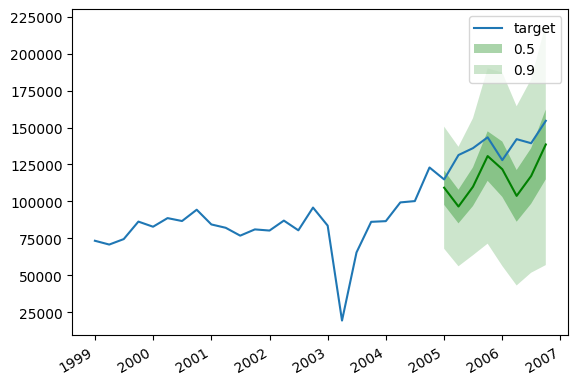

In [77]:
plot_gluonts(4)


In [78]:
dlinear_mape = agg_metrics["MAPE"]
print(f"DLinear MAPE: {dlinear_mape:.3f}")

DLinear MAPE: 0.193
